In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('laptop_data.csv',usecols=['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df['Ram']=df['Ram'].str.replace('GB','').astype('int')
df['Weight']=df['Weight'].str.replace('kg','').astype('float32')

In [4]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


<AxesSubplot:>

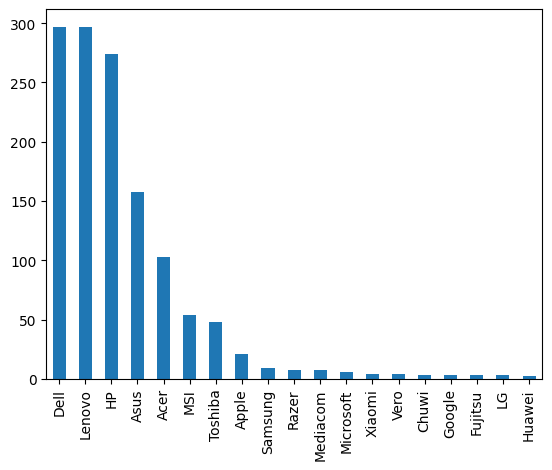

In [5]:
df['Company'].value_counts().plot(kind='bar')

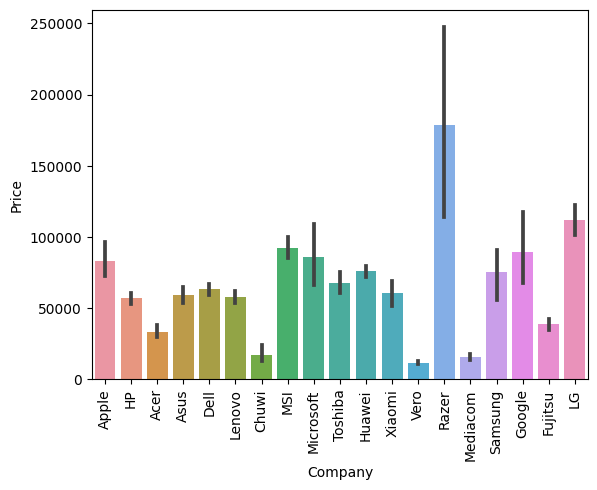

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df,x='Company',y='Price')
plt.xticks(rotation='vertical')
plt.show()


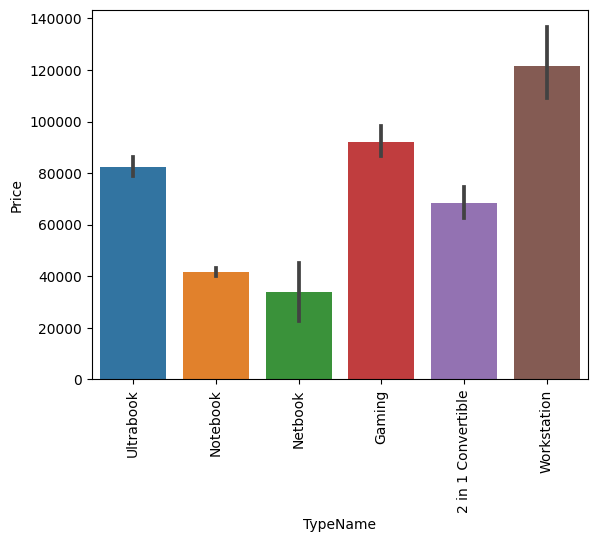

In [7]:
sns.barplot(data=df,x='TypeName',y='Price')
plt.xticks(rotation='vertical')
plt.show()


In [8]:
import re
df['touchscreen']=df['ScreenResolution'].str.findall('Touchscreen').str.get(0).str.replace('Touchscreen','1')

df['touchscreen'].fillna(0,inplace=True)
df['touchscreen']=df['touchscreen'].astype('int64')




In [9]:

df['Ips']=(df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)).astype('int64')

In [13]:
ssize=df['ScreenResolution'].str.split('x',n=1,expand=True)
df['x'],df['y']=ssize[0],ssize[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,x,y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [14]:
df['x']=(df['x'].apply(lambda x: re.findall(r'\d+',x)).str.get(0)).astype('int64')
df['y']=df['y'].astype('int64')

In [15]:
df['ppi']=((np.sqrt((df['x']**2) + (df['y']**2)))/df['Inches']).astype('float')

In [16]:
df=df[['Company', 'TypeName', 'Inches','Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'touchscreen', 'Ips','ppi']]

In [17]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [18]:
df['cpu_gen']=df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [19]:
df.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,cpu_gen
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [20]:
def process(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text=='Intel Core i3':
        return text
    elif text.split()[0] == 'intel':
        return 'intel other processor'
    else:
        return 'AMD Processor'

In [21]:
df['cpu_gen']=df['cpu_gen'].apply(process)

<AxesSubplot:>

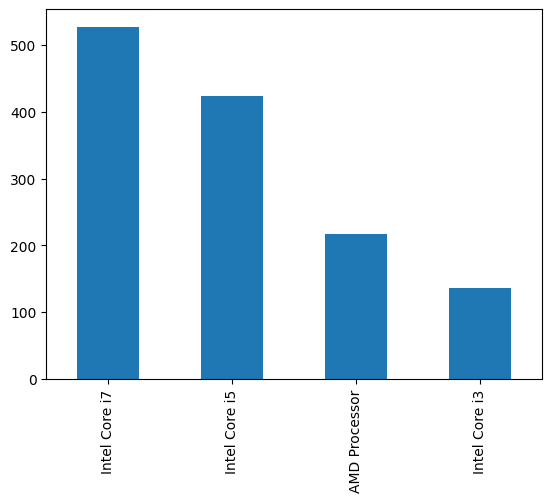

In [22]:
df['cpu_gen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='cpu_gen', ylabel='Price'>

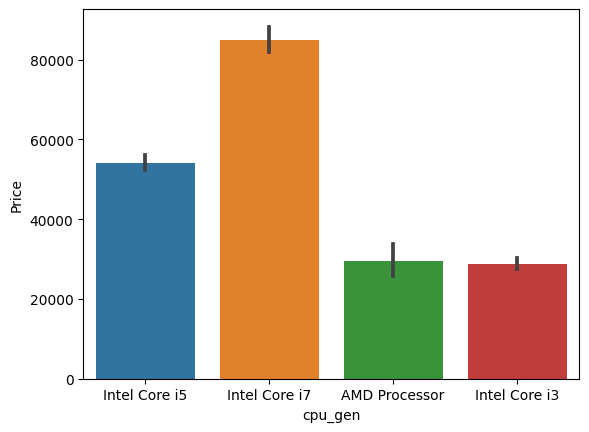

In [23]:
sns.barplot(data=df,x='cpu_gen',y='Price')

In [24]:
df.drop('Cpu',axis=1,inplace=True)

In [25]:
df.head(1)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,cpu_gen
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


In [26]:
df['Memory']=df['Memory'].str.replace('GB','').str.replace('TB','000')
new=df['Memory'].str.split('+',n=1,expand=True)

In [27]:
df['first']=new[0]
df['first'].str.strip()
df['second']=new[1]


In [28]:
df['HDD']=df['first'].apply(lambda x:1 if 'HDD'in x else 0)
df['SSD']=df['first'].apply(lambda x:1 if 'SSD'in x else 0)
df['Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid'in x else 0)
df['FlashStorage']=df['first'].apply(lambda x:1 if 'Flash Storage'in x else 0)
df['second'].fillna('0',inplace=True)
df['HDD1']=df['second'].apply(lambda x:1 if 'HDD'in x else 0)
df['SSD1']=df['second'].apply(lambda x:1 if 'SSD'in x else 0)
df['Hybrid1']=df['second'].apply(lambda x:1 if 'Hybrid'in x else 0)
df['FlashStorage1']=df['second'].apply(lambda x:1 if 'Flash Storage'in x else 0)

df['second']=(df['second'].apply(lambda x: re.sub(r'\D','',x))).astype('int')
df['first']=(df['first'].apply(lambda x: re.sub(r'\D','',x))).astype('int')


In [29]:
re.sub(r'\D','','128ssd')

'128'

In [30]:
df['hdd']=df['first']*df['HDD']+df['second']*df['HDD1']
df['ssd']=df['first']*df['SSD']+df['second']*df['SSD1']
df['hybrid']=df['first']*df['Hybrid']+df['second']*df['Hybrid1']
df['flashS']=df['first']*df['FlashStorage']+df['second']*df['FlashStorage1']

In [31]:
df.drop(columns=['first','Memory',
       'second', 'HDD', 'SSD', 'Hybrid', 'FlashStorage', 'HDD1', 'SSD1',
       'Hybrid1', 'FlashStorage1'],inplace=True)

In [32]:
df.head(1
)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,cpu_gen,hdd,ssd,hybrid,flashS
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0


<AxesSubplot:>

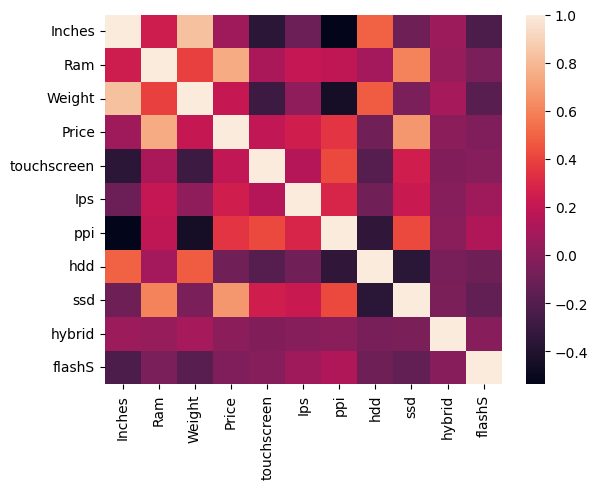

In [33]:

sns.heatmap(df.corr())


In [34]:
df['GPU Brand']=df['Gpu'].apply(lambda x: x.split()[0])
df.drop('Gpu',axis=1,inplace=True)
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,cpu_gen,hdd,ssd,hybrid,flashS,GPU Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


<AxesSubplot:xlabel='GPU Brand', ylabel='Price'>

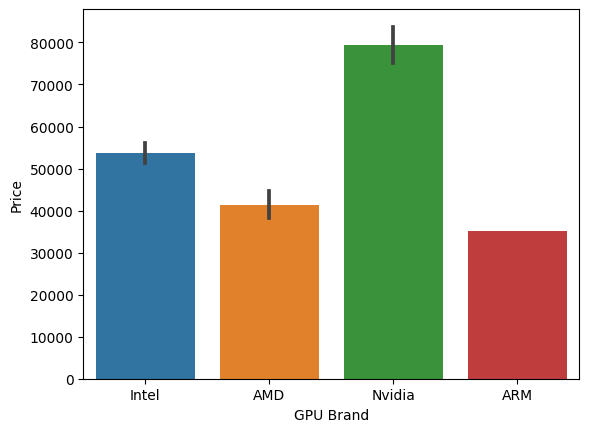

In [35]:
sns.barplot(data=df,x='GPU Brand',y='Price')

In [36]:
df=df[df['GPU Brand']!='ARM']

In [37]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,cpu_gen,hdd,ssd,hybrid,flashS,GPU Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [38]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [39]:
def oprating(text):
    if text =='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text == 'macOS'or text=='Mac OS X':
        return 'Mac'
    else:
        return 'Other/Linux'

In [40]:
df['OpSys']=df['OpSys'].apply(oprating)
df.sample(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,cpu_gen,hdd,ssd,hybrid,flashS,GPU Brand
99,HP,Gaming,15.6,12,Windows,2.620,66546.720,0,1,141.211998,Intel Core i7,1000,128,0,0,Nvidia
1256,Asus,Gaming,17.3,16,Windows,4.000,101232.000,0,1,127.335675,Intel Core i7,1000,128,0,0,Nvidia
370,Asus,2 in 1 Convertible,15.6,12,Windows,2.260,58554.720,1,0,141.211998,Intel Core i7,2000,512,0,0,Nvidia
670,Microsoft,Ultrabook,13.5,8,Windows,1.252,99519.048,1,0,200.842560,Intel Core i7,0,256,0,0,Intel
354,Toshiba,Notebook,15.6,16,Windows,2.400,74751.840,0,1,141.211998,Intel Core i7,0,512,0,0,Nvidia


In [43]:
df=df[['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Price',
       'touchscreen', 'Ips', 'ppi', 'cpu_gen', 'hdd', 'ssd', 'GPU Brand']]

In [44]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [45]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [47]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,touchscreen,Ips,ppi,cpu_gen,hdd,ssd,GPU Brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Other/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [48]:
def model(text):
    step1=ColumnTransformer(transformers=[
    ('onehot',OneHotEncoder(sparse=False,drop='first'),[0,1,4,9,12]),],remainder='passthrough')
    step2=text
    pipe=Pipeline([
    ('step1',step1),
    ('step2',step2),])
    pipe.fit(X_train,y_train)
    y_predick=pipe.predict(X_test)
    return print('Model perfomess',r2_score(y_test,y_predick),'\nMAE',mean_absolute_error(y_test,y_predick))

In [49]:
model(Lasso(alpha=0.1,max_iter=500))
model(Ridge(alpha=0.1,max_iter=500))
model(AdaBoostRegressor(n_estimators=200,learning_rate=2))
model(GradientBoostingRegressor(min_samples_leaf=3,n_estimators=650))

Model perfomess 0.5680911172438536 
MAE 0.296286628745712
Model perfomess 0.7871577404287093 
MAE 0.20659483186799493
Model perfomess 0.7889651800301632 
MAE 0.22286464383372387
Model perfomess 0.8829259823308306 
MAE 0.15212091776360653


In [50]:
model(RandomForestRegressor())

Model perfomess 0.8675478729356367 
MAE 0.15981832211914435


In [52]:
parametr={'step2__min_samples_leaf':[3,4,2],'step2__n_estimators':[650,550,600]}
step1=ColumnTransformer(transformers=[('onehot',OneHotEncoder(sparse=False,drop='first'),[0,1,4,9,12]),],remainder='passthrough')
step2=GradientBoostingRegressor(min_samples_leaf=3,n_estimators=650)
pipe=Pipeline([('step1',step1),('step2',step2)])

check=GridSearchCV(pipe,parametr,cv=5,)
check.fit(X_train,y_train)
print(check.best_params_,'\n',check.best_score_,)

{'step2__min_samples_leaf': 2, 'step2__n_estimators': 650} 
 0.8801752526164875


In [53]:
step1=ColumnTransformer(transformers=[('onehot',OneHotEncoder(sparse=False,drop='first'),[0,1,4,9,12]),],remainder='passthrough')


gbr=GradientBoostingRegressor(min_samples_leaf=3,n_estimators=650)
xg=XGBRegressor()
rdf=RandomForestRegressor()

step2=VotingRegressor([('gbr',gbr),('xg',xg),('rdf',rdf)])
pipe=Pipeline([('step1',step1),('step2',step2)])
pipev=Pipeline([('step1',step1),('step2',step2)])

pipev.fit(X_train,y_train)
y_predick=pipev.predict(X_test)
print('Model perfomess',r2_score(y_test,y_predick),'\nMAE',mean_absolute_error(y_test,y_predick))


Model perfomess 0.8833292764854258 
MAE 0.14903126871602498


In [923]:
import pickle 
pickle.dump(pipev,open('model.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))